# Домашняя работа №2

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
#your answer here
"""
В генеральной совокупности полные данные, в выборке - часть генеральной совокупности
"""

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
#your answer here
"""
Не всегда, так как выборка может не отражать определённые характеристики генеральной совокупности
"""

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
#your answer here
"""
1. Длина волос всех футболистов - участников ЧМ
2. Длина волос людей от 20 до 35
3. Длина волос всех французов
"""

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
#your answer here
"""
1. Берем по 10 мальчиков и девочек каждый месяц случайным образом
2. Берем по 4 ребенка каждую неделю случайным образом
"""

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


In [4]:
#your code here
uni = stats.uniform()
sample = uni.rvs(100001)
stats.mode(sample)

ModeResult(mode=array([1.96146115e-05]), count=array([1]))

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [18]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = max(sample)*1.5
sample_with_overshoot = np.append(sample, [overshoot, overshoot])
new_med =sorted(sample)[25]
new_mean = sample_with_overshoot.mean()
med, new_med, mean, new_mean

(3.241221715206782, 3.3087952106718648, 3.6083619713640713, 3.9129666085308066)

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [21]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
#уродливая имплементация
mean_with_c = np.array([s+C for s in sample]).mean()
mean_mult_c = np.array([s*C for s in sample]).mean()
mean, mean_with_c, mean_mult_c

(2.08, 2.58, 1.04)

In [23]:
#красивая и аккуратная имплементация
mean_with_c = (sample+C).mean()
mean_mult_c = (sample*C).mean()
mean, mean_with_c, mean_mult_c

(2.08, 2.58, 1.04)

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [ ]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 
sample_with_overshoot =
new_var =

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [ ]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [25]:
beta_rv = stats.beta(1,3)
sample = beta_rv.rvs(101)
sample.mean()
#your code here

0.2801779142205361

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [31]:
gamma_rv = stats.gamma(2,2)
sample = gamma_rv.rvs(10001)
#your code here
mean = sample.mean()
var = sample.var()
med = sorted(sample)[49]
mean, var, med

(4.00177532912474, 2.0561269583177357, 2.1030744095338383)

- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [51]:
#your code here
norm_rv = stats.norm(5,2)
sample_avg = []
for i in range(10000):
    sample = norm_rv.rvs(50)
    sample_avg.append(sample.mean())
    #your code here
    
avg_mean = np.array(sample_avg).mean()
avg_var = np.array(sample_avg).var()
#получилось
avg_mean, 5,  avg_var, norm_rv.rvs(1000001).var()/50
#по ЦПТ: получаем нормальное распределение с средним 5 и дисперсией 4/50

(4.997482583248159, 5, 0.07858080415312924, 0.07993377657536883)

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

In [59]:
#your code here
sample_avg = []
for i in range(10):
    sample = norm_rv.rvs(10)
    sample_avg.append(sample.mean())
avg_mean = np.array(sample_avg).mean()
avg_var = np.array(sample_avg).var()
avg_mean, 5,  avg_var, norm_rv.rvs(1000001).var()/50

(4.789543106172273, 5, 0.5663454258903248, 0.07999343059159657)

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [70]:
expon_rv = stats.expon(3)
#your code here
new_rv_sample= (expon_rv.rvs(int(1E7)) - expon_rv.mean())/(expon_rv.var()**0.5)
new_rv_sample.mean(), new_rv_sample.var()

(0.00041928811166911664, 1.0010348070363586)

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [9]:
pearson_rv = stats.chi2(10)
pearson_rv.interval(0.9)
#your code here

(3.94029913611906, 18.307038053275146)

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [8]:
#your code here
student_rv = stats.t(15)
student_rv.interval(0.9), student_rv.interval(0.95)


((-1.7530503556925554, 1.7530503556925547),
 (-2.131449545559323, 2.131449545559323))

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [25]:
norm_rv = stats.norm(0, 2)
#your code here
sample_1 = norm_rv.rvs(51)
sample_2 = norm_rv.rvs(101)

def confidence_interval(sample, alpha):
    """
    Функция принимает:
    sample - numpy array
    alpha - действительное число
    возвращает доверительный интервал для среднего выборки,
    считая, что размер выборки достаточен 
    (применяется нормальное распределение, а не Стьюдент)
    """
    var = sample.var()
    mean = sample.mean()
    beta = (1.0-alpha)*0.5
    z_alpha = stats.norm(0,1).interval(beta)[1]
    delta = ((var/len(sample))**0.5)*z_alpha
    return ([mean-delta, mean+delta])

print(confidence_interval(sample_1, 0.9), confidence_interval(sample_2, 0.9))



[0.26450934202466, 0.30356829597633933] [0.10513180170180006, 0.1306185126354862]


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
#ошибку второго рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
#your answer here
#1 - неверно
#2 - неверно
#3 - скорее верно, чем нет

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
#0.01. 99%  доверитиельный интервал является хорошей оценкой в общем случае

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

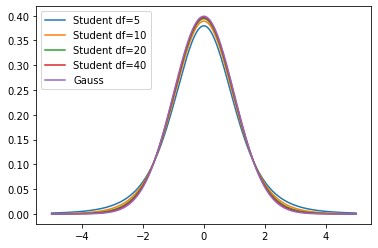

In [6]:
#your code here
st_5 = stats.t(5)
st_10 = stats.t(10)
st_20 = stats.t(20)
st_40 = stats.t(40)
norm = stats.norm(0,1)

x = np.linspace(-5,5,10001)
y5 = st_5.pdf(x)
y10 = st_10.pdf(x)
y20 = st_20.pdf(x)
y40 = st_40.pdf(x)
y0 = norm.pdf(x)

plt.plot(x,y5,label = 'Student df=5')
plt.plot(x,y10,label = 'Student df=10')
plt.plot(x,y20,label = 'Student df=20')
plt.plot(x,y40,label = 'Student df=40')
plt.plot(x,y0,label = 'Gauss')
plt.legend(loc='upper left')

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [ ]:
#your code here


- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [ ]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here